<a href="https://colab.research.google.com/github/tommylouistaylor/CEGE0004_MachineLearning/blob/master/2%20-%20Week/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

In this notebook you will learn how to implement the **ID3 decision tree learner**, reproduce the results presented in the
lecture, and learn how to **use the decision tree learners** of a popular machine learning module, scikit-learn.

## Define Dataset For Learning Task

Define a toy-dataset for the **PlayTennis learning task**; comprising features {att, cond}, examples (xs), targets (ys)

In [1]:
# FEATURES    ... dictionary containing attribute (key) and value (#)
features = {
    # keys=attribute  : values=possible conditions
    ('outlook', 0)    : {'sunny', 'overcast', 'rain'},
    ('temperature', 1): {'hot', 'mild', 'cool'},
    ('humidity', 2)   : {'high', 'normal', 'low'},
    ('wind', 3)       : {'weak', 'strong'}}

# EXAMPLES    ... list of all possible 'examples' aka combinations
xs = [['sunny', 'hot', 'high', 'weak'],
      ['sunny', 'hot', 'high', 'strong'],
      ['overcast', 'hot', 'high', 'weak'],
      ['rain', 'mild', 'high', 'weak'],
      ['rain', 'cool', 'normal', 'weak'],
      ['rain', 'cool', 'normal', 'strong'],
      ['overcast', 'cool', 'normal', 'strong'],
      ['sunny', 'mild', 'high', 'weak'],
      ['sunny', 'cool', 'high', 'weak'],
      ['rain', 'mild', 'normal', 'weak'],
      ['sunny', 'mild', 'normal', 'strong'],
      ['overcast', 'mild', 'high', 'strong'],
      ['overcast', 'hot', 'normal', 'weak'],
      ['rain', 'mild', 'high', 'strong']]

# TARGET      ... list of corresponding target values
ys = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']

## Define Tree Structure using Node Class

In [3]:
class Node:

    # method1: create new instance of the class
    def __init__(self):
        self.feature = None 
        self.children = {}
        self.label = None

    # method2: check if the node is leaf (end)
    def is_leaf(self):
        return self.label is not None

    # method3: check if node is decision/predict node (middle)
    def predict(self, x):
        if self.is_leaf():
            return self.label
        else:
            feature_i = self.feature[1]
            return self.children[x[feature_i]].predict(x)

## Construct a Decision Tree

In [4]:
# create 'no' instance of Node() class where label = 'no
no = Node()
no.label = 'no'

# create 'yes' instance of Node() class where label = 'yes'
yes = Node()
yes .label = 'yes'

# create 'humidity' instance of Node() where ...
humidity = Node()
humidity.feature = ('humidity', 2)  # set as humidity key
humidity.children['high'] = no
humidity.children['normal'] = yes

# create 'wind' instance of Node() where ...
wind = Node()
wind.feature = ('wind', 3)
wind.children['strong'] = no
wind.children['weak'] = yes

# create 'wind' instance of Node() where ...
outlook = Node()
outlook.feature = ('outlook', 0)
outlook.children['sunny'] = humidity
outlook.children['overcast'] = yes
outlook.children['rain'] = wind

play_tennis = outlook

## Show Decision Tree (Textual Form)

In [ ]:
# function to show tree as text
def show(node, skip = ''):
    if node.feature:
        print(skip, node.feature[0] + ':')
    else:
        print(skip, '->', node.label)
    for value, node in node.children.items():
        print(skip, '->', value)
        show(node, skip + '  ')

# call show function
show(play_tennis)

## Predict Tennis Play based on Example using Decision Tree Learner

In [6]:
# pass example values into predict method (ordered as per features dict)
play_tennis.predict(['sunny', 'hot', 'normal', 'weak'])

'yes'

## The ID3 Algorithm

We will now implement the ID3 algorithm in Python from scratch. As we have seen in the lecture material,
the ID3 algorithm requires the use of 3 helper functions:
1. one that allow the implementation of a measure to select the best feature, `select_best_feature`;
2. one to select the data based on a feature and feature value, `select_data`, and;
3. one to remove one feature from the list of considered features, `dict_minus`.

We start by implementing a measure to select the best feature randomly.

In [ ]:
import random

def select_best_feature(xs, ys, features):
    return random.choice(list(features.keys()))

You can try this function yourself. This function will always return a different feature, regardless of the input data.

In [ ]:
random_feature = select_best_feature(xs, ys, features)
random_feature # returns random key (aka weather attrubute) from dictionary e.g.  ('wind', 3)

('temperature', 1)

Then, we implement the `select_data` function used to partition the data.

In [ ]:
def select_data(xs, ys, feature, value):
    xs_value = []
    ys_value = []
    for x, y in zip(xs, ys):
        if x[feature[1]] == value:
            xs_value.append(x)
            ys_value.append(y)

    return xs_value, ys_value

We now test this function by selecting the examples with value hot for the feature temperature.

In [ ]:
select_data(xs, ys, ('temperature', 1), 'hot')
# returns all the xs and ys that contains temperature = hot

([['sunny', 'hot', 'high', 'weak'],
  ['sunny', 'hot', 'high', 'strong'],
  ['overcast', 'hot', 'high', 'weak'],
  ['overcast', 'hot', 'normal', 'weak']],
 ['no', 'no', 'yes', 'yes'])

This last function just returns a new dictionary, identical to the original one, but with one key removed.

In [ ]:
def dict_minus(dict, key):
    dict = dict.copy()
    dict.pop(key)
    return dict


In [ ]:
example_dict = {'A': 'I need to go', 'B': 'I need to stay', 'C': 'Me too'}
example_dict

{'A': 'I need to go', 'B': 'I need to stay', 'C': 'Me too'}

In [ ]:
dict_minus(example_dict, 'A')

{'B': 'I need to stay', 'C': 'Me too'}

We can now implement the ID3 learning algorithm.

In [ ]:
from statistics import mode

def id3(xs, ys, features):
    root = Node()
    if all([y == 'yes' for y in ys]): root.label = 'yes'
    elif all([y == 'no' for y in ys]): root.label = 'no'
    elif not features: root.label = mode(ys)
    else:
        feature = select_best_feature(xs, ys, features)
        root.feature = feature
        for value in features[feature]:
            node = Node()
            root.children[value] = node
            xs_value, ys_value = select_data(xs, ys, feature, value)
            if not xs_value: node.label = mode(ys)
            else: root.children[value] = \
                id3(xs_value, ys_value, dict_minus(features, feature))
    return root

To learn a decision tree based on the training set we will just need to invoke this function with the right parameters.

Remember that we are now using an unusual `select_best_feature` (it picks an attribute at random). Will the
learning algorithm output a decision tree that fits the training data?

In [ ]:
tree_ran = id3(xs, ys, features)

show(tree_ran)

StatisticsError: ignored

Let's now implement a better heuristic (than random) to select the best feature. We implement the one based on the error
rate.

In [ ]:
def select_best_feature(xs, ys, features):
    res = None
    min_err = None
    for feature in features:
        err = 0
        for value in features[feature]:
            xs_value, ys_value = select_data(xs, ys, feature, value)
            if ys_value:
                y_pred = mode(ys_value)
                err += sum([y_pred != y for y in ys])

        if min_err is None or err < min_err:
            min_err = err
            res = feature
    return res

Let's run this function on the original dataset and see that the feature it will select is now humidity.

In [ ]:
select_best_feature(xs, ys, features)

StatisticsError: ignored

In [ ]:
tree_err = id3(xs, ys, features)
show(tree_err)

# Decision Trees in Scikit-Learn

Scikit-learn is a free software machine learning library for Python. It features various classification, regression and
clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and
is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. In this notebook you
will learn how to use the decision trees implemented in scikit-learn.

Before you start, yous should make sure to have scikit-learn installed in your anaconda environment.

In [ ]:
!conda install --yes scikit-learn


/bin/bash: conda: command not found


## The Dataset

In this notebook you will be working with the Iris dataset. The Iris flower data set or Fisher's Iris data set is a
multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper:
"The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis".

The iris dataset is a classic and easy multi-class classification dataset. In the following table we find some of the
properties of this dataset.

| Property | Value |
|--|--|
| Classes | 3 |
| Samples per class | 50 |
| Samples total | 150 |
| Dimensionality | 4 |
| Features | real, positive |

Each example contains the measurements of four features of iris plants: the length and the width of the sepals and
petals, in centimeters; and, each example is labeled with one of three classes corresponding to one of the iris species:
iris setosa, iris virginica and iris versicolor.

Scikit-learn provides a set of famous datasets, and the Iris dataset is one of them. To load the Iris dataset we just
need to run the function `load_iris`.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

We now define the dataset we will be working with.

xs = feature matrix: values relating to the feature

ys = target matrix: the quantity we want to predict from the data aka dependent variable

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
xs = iris.data
ys = iris.target

## Learning a Decision Tree

Scikit-learn implements a `DecisionTreeClassifier` for classification tasks and a `DecisionTreeRegressor` for regression
tasks. In this notebook we will learn to use the `DecisionTreeClassifier`.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

A `DecisionTreeClassifier` object takes as input two arrays: an array `xs`, sparse or dense, of shape
(n_samples, n_features) holding the training samples, and an array `ys` of integer values, shape (n_samples,),
holding the class labels for the training samples.

Read more about the property of this class directly from the documentation of scikit-learn following this
[link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

To train this classifier with default parameters you just need to create a `DecisionTreeClassifier` object and invoke
the method fit on the training data.

In [ ]:
toy_xs = [[0, 0], [1, 1]]
toy_ys = ['yes', 'no']

tree_clf = DecisionTreeClassifier()

tree_clf.fit(toy_xs, toy_ys)

DecisionTreeClassifier()

You can now use the method predict to test this tree on a new example.

In [ ]:
tree_clf.predict([[0, 1]])


array(['yes'], dtype='<U3')

We can also visualize the tree by using the method `plot_tree`.

[Text(0.5, 0.75, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

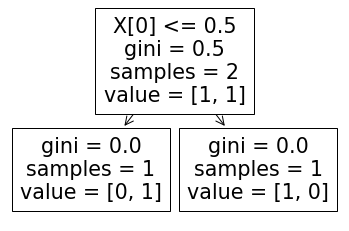

In [ ]:
from sklearn.tree import plot_tree

plot_tree(tree_clf)

What we can see here is that this tree rather than using the Entropy uses the gini index. We can change that by changing
the `criterion` parameter of the decision tree.

We now train a decision tree on the Iris dataset.

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

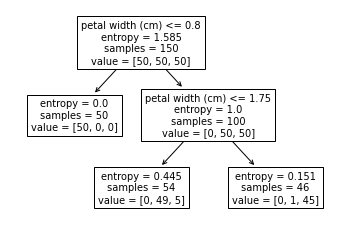

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree_clf.fit(xs, ys)

plot_tree(tree_clf, feature_names=iris.feature_names)

## Evaluating the Decision Tree

To evaluate the performance of the decision tree trained we use the accuracy measure. The accuracy measure tells us
what is the proportion of the dataset that has been correctly classified.

Follow this
[link](https://developers.google.com/machine-learning/crash-course/classification/accuracy)
to learn more about this measure.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=ys, y_pred=tree_clf.predict(xs))

0.96

## Decision Boundary

In the following we want to visualize the decision boundary of a learned decision tree for the Iris dataset. To make
the visualization readable we do this for feature pairs. We select these pairs via
the variables `axis_0`, and `axis_1`.

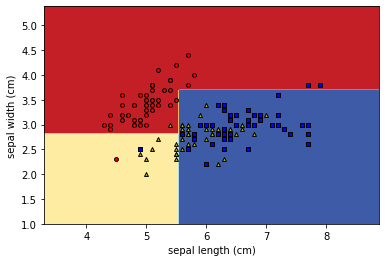

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# let's train a decision tree only on two features
axis_0 = 0
axis_1 = 1

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree_clf.fit(xs[:, [axis_0, axis_1]], ys)

# create a grid of points to plot the countour
x_min, x_max = xs[:, 0].min() - 1, xs[:, 0].max() + 1
y_min, y_max = xs[:, 1].min() - 1, xs[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

# predict the outcome for the grid of points
zz = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)
cs = plt.contourf(xx, yy, zz, cmap=plt.cm.RdYlBu)

# define axis
plt.xlabel(iris.feature_names[axis_0])
plt.ylabel(iris.feature_names[axis_1])

# plot the dataset
for i, color, marker in zip(range(3), 'ryb', 'o^s'):
    idx = np.where(ys == i)
    plt.scatter(xs[idx, axis_0], xs[idx, axis_1], c=color, marker=marker, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
